In [5]:
!pip install geopandas

In [6]:
# import necessary packages
import os
import geopandas as gpd
from geopandas import GeoSeries
import shapely
from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString, box
from matplotlib import pyplot as plt
import fiona

In [7]:
!wget https://www.gis.lcc.mn.gov/redist2020/Congressional/C2103_0/geography/c2103_0-shp.zip -O Wattson.zip
!unzip -o Wattson.zip

--2022-04-01 20:51:45--  https://www.gis.lcc.mn.gov/redist2020/Congressional/C2103_0/geography/c2103_0-shp.zip
Resolving www.gis.lcc.mn.gov (www.gis.lcc.mn.gov)... 156.98.79.215
Connecting to www.gis.lcc.mn.gov (www.gis.lcc.mn.gov)|156.98.79.215|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1051012 (1.0M) [application/zip]
Saving to: ‘Wattson.zip’

Wattson.zip         100%[===================>]   1.00M  --.-KB/s    in 0.1s    

2022-04-01 20:51:45 (8.65 MB/s) - ‘Wattson.zip’ saved [1051012/1051012]

Archive:  Wattson.zip
  inflating: c2103_0.dbf             
  inflating: c2103_0.prj             
  inflating: c2103_0.shp             
  inflating: c2103_0.shx             


In [8]:
# path to shapefile
filepath = "./c2103_0.shp"

# read file using gpd.read_file()
data = gpd.read_file(filepath)

In [9]:
data.head() #look at top entries - looks like a pandas dataframe

,ID,AREA,DISTRICT,MEMBERS,LOCKED,NAME,POPULATION,NH_WHT,HISPANIC_O,NH_DOJ_BLK,...,F_NH18_DO3,F_NH18_DO4,F_NH18_DO5,F_NH18_WHT,F_18_POP,F_DEM_INDE,F_REP_INDE,F_THIRD_IN,DISTRICT_L,geometry
0,1,12108.357400,1,1.0,None,None,713312,584230,53845,27568,...,0.000608,0.002736,0.022426,0.850180,0.770019,0.484138,0.468371,0.047491,1|0%,"POLYGON ((573589.341 4893719.756, 573601.319 4..."
1,2,2129.459710,2,1.0,None,None,713312,537051,52842,45374,...,0.000421,0.003839,0.030018,0.791552,0.750091,0.492985,0.461661,0.045355,2|0%,"POLYGON ((518210.403 4967646.485, 518203.950 4..."
2,3,467.276123,3,1.0,None,None,713312,512857,36739,64092,...,0.000226,0.003784,0.030427,0.761924,0.767691,0.521367,0.443602,0.035031,3|0%,"POLYGON ((473927.062 4959795.967, 473851.300 4..."
3,4,351.516968,4,1.0,None,None,713312,443506,52769,79744,...,0.000338,0.003794,0.033593,0.678843,0.771839,0.637519,0.310813,0.051668,4|0%,"POLYGON ((483609.368 4986942.178, 483582.508 4..."
4,5,136.983948,5,1.0,None,None,713311,425023,72867,123937,...,0.000405,0.004776,0.040149,0.651386,0.803356,0.750678,0.198291,0.051031,5|-0%,"POLYGON ((479098.152 4996824.609, 479204.312 4..."


In [10]:
data.columns

Index(['ID', 'AREA', 'DISTRICT', 'MEMBERS', 'LOCKED', 'NAME', 'POPULATION',
       'NH_WHT', 'HISPANIC_O', 'NH_DOJ_BLK', 'NH_DOJ_IND', 'NH_DOJ_ASN',
       'NH_DOJ_HWN', 'NH_DOJ_OTH', 'NH_DOJ_OT1', 'H18_POP', 'NH18_DOJ_B',
       'NH18_DOJ_I', 'NH18_DOJ_A', 'NH18_DOJ_H', 'NH18_DOJ_O', 'NH18_DOJ_1',
       'NH18_WHT', 'F18_POP', 'DEM_INDEX', 'REP_INDEX', 'THIRD_INDE',
       'INDEX_VOTE', 'IDEAL_VALU', 'DEVIATION', 'F_DEVIATIO', 'F_NH_WHT',
       'F_HISPANIC', 'F_NH_DOJ_B', 'F_NH_DOJ_I', 'F_NH_DOJ_A', 'F_NH_DOJ_H',
       'F_NH_DOJ_O', 'F_NH_DOJ_1', 'F_NH18_DOJ', 'F_NH18_DO1', 'F_NH18_DO2',
       'F_NH18_DO3', 'F_NH18_DO4', 'F_NH18_DO5', 'F_NH18_WHT', 'F_18_POP',
       'F_DEM_INDE', 'F_REP_INDE', 'F_THIRD_IN', 'DISTRICT_L', 'geometry'],
      dtype='object')

In [11]:
# note the column 'geometry' is full of shapely Polygon objects
type(data['geometry'].iloc[0])

shapely.geometry.polygon.Polygon

In [12]:
data['geometry']

0    POLYGON ((573589.341 4893719.756, 573601.319 4...
1    POLYGON ((518210.403 4967646.485, 518203.950 4...
2    POLYGON ((473927.062 4959795.967, 473851.300 4...
3    POLYGON ((483609.368 4986942.178, 483582.508 4...
4    POLYGON ((479098.152 4996824.609, 479204.312 4...
5    POLYGON ((460089.810 5029157.405, 460833.902 5...
6    POLYGON ((334960.148 5185735.354, 335051.978 5...
7    POLYGON ((330320.281 5429929.208, 330497.187 5...
Name: geometry, dtype: geometry

In [13]:
# get bounds of all the geometry data
data.bounds

,minx,miny,maxx,maxy
0,220816.244592,4.816304e+06,644098.483214,4.932607e+06
1,448458.155176,4.884064e+06,591242.110171,4.974433e+06
2,439715.071843,4.959171e+06,484413.530651,5.010479e+06
3,481680.618853,4.967615e+06,520487.606334,4.996810e+06
4,463948.723508,4.967629e+06,486006.763550,4.996825e+06
5,401066.381866,4.932330e+06,520002.528022,5.058578e+06
6,189783.473350,4.856681e+06,440766.688164,5.436128e+06
7,266812.875712,5.015861e+06,762236.958840,5.472428e+06


In [14]:
# get attributes such as boundary
data.boundary

0    LINESTRING (573589.341 4893719.756, 573601.319...
1    LINESTRING (518210.403 4967646.485, 518203.950...
2    LINESTRING (473927.062 4959795.967, 473851.300...
3    LINESTRING (483609.368 4986942.178, 483582.508...
4    LINESTRING (479098.152 4996824.609, 479204.312...
5    LINESTRING (460089.810 5029157.405, 460833.902...
6    LINESTRING (334960.148 5185735.354, 335051.978...
7    LINESTRING (330320.281 5429929.208, 330497.187...
dtype: geometry

In [15]:
# area will warn you if you're trying to do area calculations in geographic CRS
data.area

0    3.140774e+10
1    5.522719e+09
2    1.212029e+09
3    9.117263e+08
4    3.552993e+08
5    6.286521e+09
6    8.015692e+10
7    9.928169e+10
dtype: float64

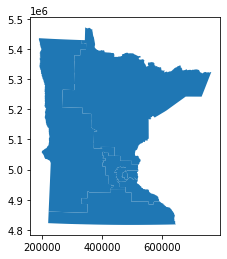

In [16]:
data.plot()

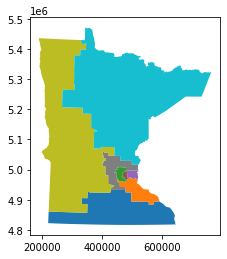

In [17]:
data.plot(column = 'DISTRICT')

In [18]:
print(data['DISTRICT'].unique())

['1' '2' '3' '4' '5' '6' '7' '8']


In [19]:
dt_1 = data[data['DISTRICT'] == '1']['geometry']

p_1 = shapely.ops.unary_union(dt_1).length / 1000
print("District 1 perimeter is: {:.1f} km".format(p_1))
a_1 = shapely.ops.unary_union(dt_1).area / 10**6
print("District 1 area is: {:.1f} km^2".format(a_1))
c_1 = shapely.ops.unary_union(dt_1).convex_hull.area / 10**6
print("District 1 convex hull area is: {:.1f} km^2".format(c_1))

District 1 perimeter is: 1130.2 km
District 1 area is: 31407.7 km^2
District 1 convex hull area is: 38146.4 km^2


In [20]:
dt_2 = data[data['DISTRICT'] == '2']['geometry']

p_2 = shapely.ops.unary_union(dt_2).length / 1000
print("District 2 perimeter is: {:.1f} km".format(p_2))
a_2 = shapely.ops.unary_union(dt_2).area / 10**6
print("District 2 area is: {:.1f} km^2".format(a_2))
c_2 = shapely.ops.unary_union(dt_2).convex_hull.area / 10**6
print("District 2 convex hull area is: {:.1f} km^2".format(c_2))

District 2 perimeter is: 485.9 km
District 2 area is: 5522.7 km^2
District 2 convex hull area is: 7526.1 km^2


In [21]:
dt_3 = data[data['DISTRICT'] == '3']['geometry']

p_3 = shapely.ops.unary_union(dt_3).length / 1000
print("District 3 perimeter is: {:.1f} km".format(p_3))
a_3 = shapely.ops.unary_union(dt_3).area / 10**6
print("District 3 area is: {:.1f} km^2".format(a_3))
c_3 = shapely.ops.unary_union(dt_3).convex_hull.area / 10**6
print("District 3 convex hull are is: {:.1f} km^2".format(c_3))

District 3 perimeter is: 273.2 km
District 3 area is: 1212.0 km^2
District 3 convex hull are is: 1764.6 km^2


In [22]:
dt_4 = data[data['DISTRICT'] == '4']['geometry']

p_4 = shapely.ops.unary_union(dt_4).length / 1000
print("District 4 perimeter is: {:.1f} km".format(p_4))
a_4 = shapely.ops.unary_union(dt_4).area / 10**6
print("District 4 area is: {:.1f} km^2".format(a_4))
c_4 = shapely.ops.unary_union(dt_4).convex_hull.area / 10**6
print("District 4 convex hull are is: {:.1f} km^2".format(c_4))

District 4 perimeter is: 163.9 km
District 4 area is: 911.7 km^2
District 4 convex hull are is: 1046.7 km^2


In [23]:
dt_5 = data[data['DISTRICT'] == '5']['geometry']

p_5 = shapely.ops.unary_union(dt_5).length / 1000
print("District 5 perimeter is: {:.1f} km".format(p_5))
a_5 = shapely.ops.unary_union(dt_5).area / 10**6
print("District 5 area is: {:.1f} km^2".format(a_5))
c_5 = shapely.ops.unary_union(dt_5).convex_hull.area / 10**6
print("District 5 convex hull are is: {:.1f} km^2".format(c_5))

District 5 perimeter is: 123.7 km
District 5 area is: 355.3 km^2
District 5 convex hull are is: 459.9 km^2


In [24]:
dt_6 = data[data['DISTRICT'] == '6']['geometry']

p_6 = shapely.ops.unary_union(dt_6).length / 1000
print("District 6 perimeter is: {:.1f} km".format(p_6))
a_6 = shapely.ops.unary_union(dt_6).area / 10**6
print("District 6 area is: {:.1f} km^2".format(a_6))
c_6 = shapely.ops.unary_union(dt_6).convex_hull.area / 10**6
print("District 6 convex hull area is: {:.1f} km^2".format(c_6))

District 6 perimeter is: 709.3 km
District 6 area is: 6286.5 km^2
District 6 convex hull area is: 10685.4 km^2


In [25]:
dt_7 = data[data['DISTRICT'] == '7']['geometry']

p_7 = shapely.ops.unary_union(dt_7).length / 1000
print("District 7 perimeter is: {:.1f} km".format(p_7))
a_7 = shapely.ops.unary_union(dt_7).area / 10**6
print("District 7 area is: {:.1f} km^2".format(a_7))
c_7 = shapely.ops.unary_union(dt_7).convex_hull.area / 10**6
print("District 7 convex hull area is: {:.1f} km^2".format(c_7))

District 7 perimeter is: 2421.2 km
District 7 area is: 80156.9 km^2
District 7 convex hull area is: 117206.3 km^2


In [26]:
dt_8 = data[data['DISTRICT'] == '8']['geometry']

p_8 = shapely.ops.unary_union(dt_8).length / 1000
print("District 8 perimeter is: {:.1f} km".format(p_8))
a_8 = shapely.ops.unary_union(dt_8).area / 10**6
print("District 8 area is: {:.1f} km^2".format(a_8))
c_8 = shapely.ops.unary_union(dt_8).convex_hull.area / 10**6
print("District 8 convex hull area is: {:.1f} km^2".format(c_8))

District 8 perimeter is: 2070.7 km
District 8 area is: 99281.7 km^2
District 8 convex hull area is: 139220.8 km^2
